In [1]:
import pymysql
import pandas as pd
import seaborn as sns

In [6]:
#pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
conn = pymysql.connect(host='localhost', port=int(3306), user='root', passwd='spartandb', db='spartan')

In [4]:
data = pd.read_sql_query('SELECT * FROM bastazo_common_vulnerabilitytopackage', conn)
data_adv = pd.read_sql_query('SELECT * FROM bastazo_common_patch', conn)

In [159]:
data.shape

(710281, 8)

In [160]:
data.source.value_counts()

redhat    626303
suse       50151
ubuntu     21586
debian     12241
Name: source, dtype: int64

In [6]:
def extract_name(rpm):
    nameindex = rpm.find('-')
    name = rpm[:nameindex]
    return name

In [7]:
data.loc[data.source=='redhat', 'package'] = data.loc[data.source=='redhat','package'].apply(extract_name)

In [7]:
data.head()

,id,is_new,is_update,cve_id,package,operatingsystem_cpe,source,record_updated
0,1,1,0,CVE-2000-1191,htdig,None,redhat,2021-08-29 04:29:44.860328
1,2,1,0,CVE-2000-1191,htdig,None,redhat,2021-08-29 04:29:44.860328
2,3,1,0,CVE-2005-2873,kernel,None,redhat,2021-08-29 04:29:44.860328
3,4,1,0,CVE-2006-1863,kernel,None,redhat,2021-08-29 04:29:44.860328
4,5,1,0,CVE-2007-1592,kernel,None,redhat,2021-08-29 04:29:44.860328


In [163]:
data.source.value_counts()

redhat    626303
suse       50151
ubuntu     21586
debian     12241
Name: source, dtype: int64

## BASELINE IMPORT(NON FILTERS)

<AxesSubplot:xlabel='source', ylabel='count'>

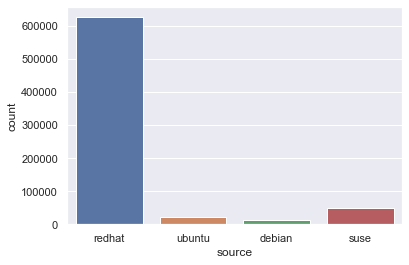

In [164]:
sns.set_theme(style='darkgrid')
sns.countplot(x='source', data=data)

## DISTINCT CVE BY VENDOR

In [8]:
# distinct_cve = data.groupby(['cve_id', 'source']).first()
distinct_cve = data.drop_duplicates(['cve_id', 'source'])

In [9]:
distinct_cve.source.value_counts()

suse      16170
redhat    14074
debian    10654
ubuntu     6514
Name: source, dtype: int64

[Text(0.5, 1.0, 'Number of CVE reported by the Vendor')]

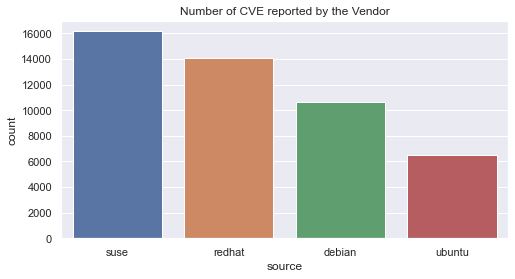

In [18]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x='source', data=distinct_cve, order=distinct_cve['source'].value_counts().index).set(title='Number of CVE reported by the Vendor')

## DISTINCT PACKAGE BY VENDOR

In [101]:
distinct_pkg = data.drop_duplicates(['package', 'source'])
#distinct_pkg = data.groupby(['package', 'source']).agg('first')

In [102]:
distinct_pkg.source.value_counts()

debian    2399
suse      1730
redhat    1611
ubuntu    1564
Name: source, dtype: int64

In [103]:
distinct_pkg.shape

(7304, 8)

<AxesSubplot:xlabel='source', ylabel='count'>

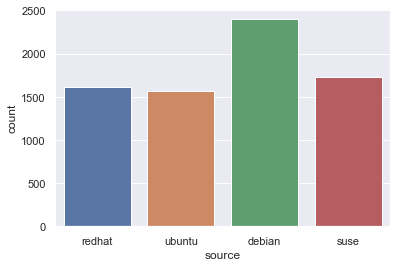

In [23]:
sns.countplot(x='source', data=distinct_pkg)

## DISTINCT CVE AND PACKAGE BY VENDOR

In [36]:
# data_cvepkg = pd.read_sql_query('SELECT DISTINCT cve_id, package, source FROM bastazo_common_vulnerabilitytopackage', conn)

In [9]:
distinct_cvepkgsrc = data.drop_duplicates(['cve_id', 'package', 'source'])

In [10]:
distinct_cvepkgsrc.source.value_counts()

suse      48614
redhat    45877
debian    12241
ubuntu    11668
Name: source, dtype: int64

In [11]:
distinct_cvepkgsrc.shape

(118400, 8)

<AxesSubplot:xlabel='source', ylabel='count'>

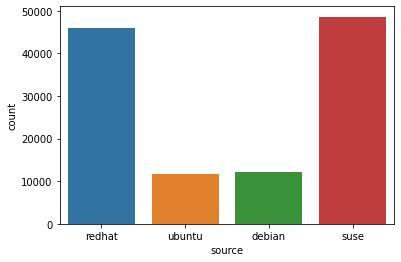

In [12]:
sns.countplot(x='source', data=distinct_cvepkgsrc)

## Group by cve and package

In [13]:
grp_cvepkg = distinct_cvepkgsrc.groupby(['cve_id', 'package'], as_index=False)['source'].count()
grp_cvepkg.sort_values(['source'], ascending=False)

,cve_id,package,source
46554,CVE-2017-12132,glibc,4
56631,CVE-2018-10767,libgxps,4
60667,CVE-2018-16420,opensc,4
60668,CVE-2018-16421,opensc,4
60669,CVE-2018-16422,opensc,4
...,...,...,...
37011,CVE-2016-1000345,candlepin,1
37010,CVE-2016-1000345,bouncycastle,1
37009,CVE-2016-1000345,ansiblerole,1
37008,CVE-2016-1000344,tfm,1


In [116]:
grp_cvepkg.source.value_counts()

1    97422
2     6610
3     1240
4      128
Name: source, dtype: int64

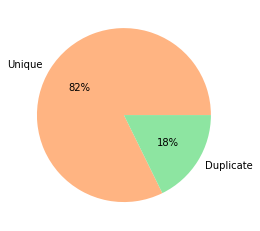

In [15]:
counts = [97422, 20978]
labels = ['Unique', 'Duplicate']
plt.figure(figsize=(4,4))
colors = sns.color_palette('pastel')[1:10]
plt.pie(x=counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='source', ylabel='count'>

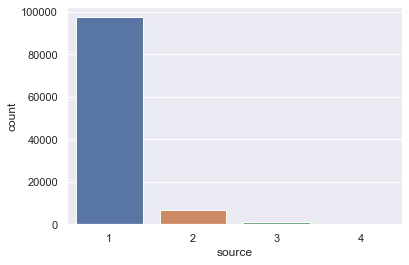

In [118]:
sns.countplot(x='source', data=grp_cvepkg)

## Package names extracted from cloud instances

In [119]:
local_packages = pd.read_csv('linuxpackages.csv')
local_packages.drop_duplicates(['name                           ', 'Vendor'])

,name,Vendor
0,SLES,suse
1,SUSEConnect,suse
2,aaa_base,suse
3,aaa_base-extras,suse
4,apparmor-parser,suse
...,...,...
3950,gnutls,redhat
3951,trousers,redhat
3952,libmodulemd,redhat
3953,NetworkManager-libnm,redhat


In [120]:
local_packages.head()

,name,Vendor
0,SLES,suse
1,SUSEConnect,suse
2,aaa_base,suse
3,aaa_base-extras,suse
4,apparmor-parser,suse


In [21]:
local_packages.Vendor.value_counts()

ubuntu    2617
suse       610
redhat     397
debian     331
Name: Vendor, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Vendor', ylabel='count'>

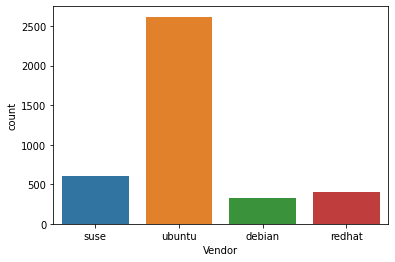

In [22]:
sns.countplot(x='Vendor', data=local_packages)

In [122]:
local_pkgs = local_packages.groupby(['name                           '], as_index=False)['Vendor'].count()

In [123]:
local_pkgs.sort_values(['Vendor'], ascending=False)

,name,Vendor
2034,passwd,4
1632,man-db,4
2897,rsyslog,4
1996,openssl,4
2936,sed,4
...,...,...
1248,linux-oracle-tools-5.4.0-1043,1
1249,linux-riscv-5.8-headers-5.8.0-14,1
1250,linux-riscv-5.8-headers-5.8.0-16,1
1251,linux-riscv-5.8-headers-5.8.0-17,1


In [124]:
local_pkgs.Vendor.value_counts()

1    3028
2     293
3      79
4      26
Name: Vendor, dtype: int64

<AxesSubplot:xlabel='Vendor', ylabel='count'>

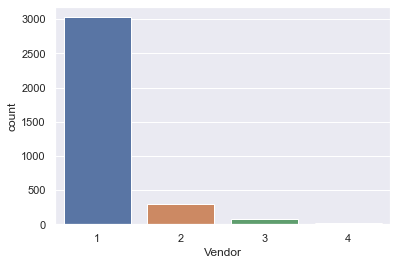

In [125]:
sns.countplot(x='Vendor', data=local_pkgs)

## Security Advisories

In [5]:
data_adv.shape

(73476, 12)

In [5]:
data_adv.replace(to_replace='None', value=np.nan, inplace=True)
data = data_adv.dropna(subset=['vendor'], how='any')

In [7]:
data.shape

(4552, 12)

<AxesSubplot:xlabel='vendor', ylabel='count'>

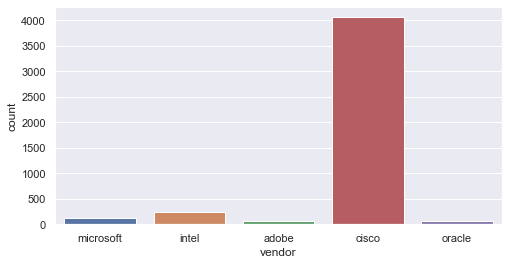

In [34]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x='vendor', data=data)

In [6]:
data.vendor.value_counts()

cisco        4061
intel         248
microsoft     116
adobe          72
oracle         55
Name: vendor, dtype: int64

In [10]:
data.shape

(4552, 12)

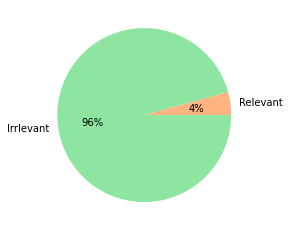

In [19]:
counts = [457, 10197]
labels = ['Relevant', 'Irrlevant']
plt.figure(figsize=(4,4))
colors = sns.color_palette('pastel')[1:10]
plt.pie(x=counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

## Debian CVE analysis

In [ ]:
counts = [4480, 72]
labels = ['Inconsistent', 'Consistent']
plt.figure(figsize=(5,5))
colors = sns.color_palette('pastel')[1:10]
plt.pie(x=counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()